<a href="https://colab.research.google.com/github/Benja2133/Guias-RedesNeuronales/blob/main/redes_neuronales_2025_guia_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El modelo de **Izhikevich**

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Incorpore a la notebook el integrador de ODEs de la guía anterior.

In [1]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# 1.2)
#import ode

def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)

def rk4(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.

    Argumentos de entrada:

        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Runge-Kutta de orden 4.

    # Ejemplos:
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x+h*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## **Ejercicio 2)** Modelo de Izhikevich

El modelo de Izhikevich (ref. 1.) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ref. 2. y premio Nobel en Fisiología y Medicina de 1963) para describir el comportamiento del potencial de disparo de una neurona.

El modelo de Izhikevich se describe en términos de la siguiente ODE bidimensional y de primer orden

\begin{eqnarray}
v'(t) &=& g_2v^2(t) + g_1v(t) + g_0 - u(t) + I(t) \\
u'(t) &=& b(cv(t)-u(t))
\end{eqnarray}

unida al mecanismo de *reseteo* del potencial

\begin{eqnarray}
v(t) &\leftarrow& v_- \\
u(t) &\leftarrow& u(t) + \Delta u \\
\end{eqnarray}

la cuál emula el disparo de la neurona, imponiendose cuando la condición $v(t)\geq v_+$ se cumple.

En todas estas ecuaciones, $g_2$, $g_1$, $g_0$, $v_-$, $v_+$, $b$, $c$ y $\Delta u$ son parámetros del modelo.

Además, se considera la función dependiente del tiempo $I:\mathbb{R}\ni t\to I(t)\in \mathbb{R}$, la cual representa una corriente de entrada que exita a la neurona.

Referencias:

1. [Eugene M. Izhikevich, Simple Model of Spiking Neurons, IEEE TRANSACTIONS ON NEURAL NETWORKS, VOL. 14, NO. 6, P. 1569, NOVEMBER 2003](https://ieeexplore.ieee.org/document/1257420)
  
    [PDF de acceso libre](https://www.izhikevich.org/publications/spikes.pdf)
2. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

***

**1)** Integre el modelo de Izhikevich usando el método RK4 en el intérvalo de tiempo

* $t\in [0,200]$

Considere, para ello, la siguiente elección de valores de los parámetros

* $g_2=0.04$

* $g_1=5$

* $g_0=150$

* $v_-=-65$

* $v_+=30$

* $b=0.02$

* $c=0.2$

* $\Delta u=2$

una corriente de entrada

\begin{eqnarray}
I(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 10 \\
10 & c.c.
\end{array}
\right.
\end{eqnarray}

y la condición inicial

* $v(0) = -70$

* $u(0) = cv(0)$

Además, utilice el paso de integración

$h=0.1$

**2)** Grafique la solución.

**3)** Reproduzca, aproximadamente, los últimos 8 paneles de la figura 2 del paper en la referencia 1.

Para ello, tenga en cuenta la siguiente tabla confeccionada a partir de la información en la figura 2 del paper

$$
\begin{aligned}
& \text {Tabla 1. Parmaterización por caso. }\\
&\begin{array}{ccccc}
\hline \hline
\text { Caso } & b & c & v_- & \Delta u & I \\
\hline
\text { RS }  & 0.02 & 0.2  & -65 & 8    & I_1 \\
\text { IB }  & 0.02 & 0.2  & -55 & 4    & I_1 \\
\text { CH }  & 0.02 & 0.2  & -50 & 2    & I_1 \\
\text { FS }  & 0.1  & 0.2  & -65 & 2    & I_1 \\
\text { TC1 } & 0.02 & 0.25 & -65 & 0.05 & I_2 \\
\text { TC2 } & 0.02 & 0.25 & -65 & 0.05 & I_3 \\
\text { RZ }  & 0.1  & 0.26 & -65 & 2    & I_4 \\
\text { LTS } & 0.02 & 0.25 & -65 & 2    & I_1 \\
\hline
\end{array}
\end{aligned}
$$

donde

\begin{eqnarray}
I_1(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 25 \\
10 & c.c.
\end{array}
\right. \\
I_2(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 150 \\
2.5 & c.c.
\end{array}
\right. \\
I_3(t)
&=&
\left\{
\begin{array}{ll}
-15  & t < 100 \\
0 & c.c.
\end{array}
\right. \\
I_4(t)
&=&
\left\{
\begin{array}{ll}
0    & t < 10 \\
.2 & 10 \leq t < 100 \\
10   & 100 \leq t < 101 \\
.2 & c.c.
\end{array}
\right.
\end{eqnarray}

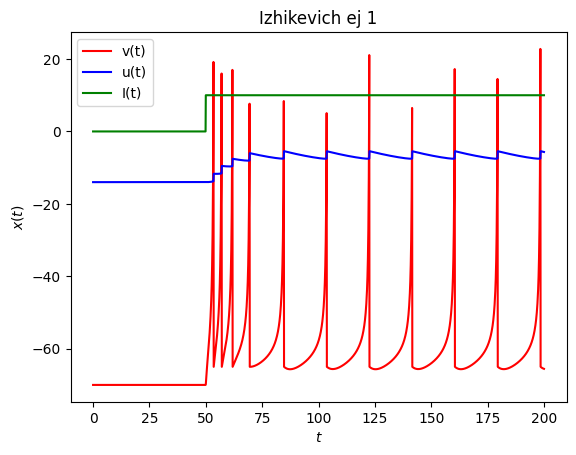

In [42]:
# 2.1)
def I(t):
    return 0 if t < 50 else 10
    
def f(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I(t),
                    b * (c * v - u)
                    ])
    
def pot_reset(x,t,p):
    v = x[0]
    u = x[1]
    v_mns = p[5]
    v_pls = p[6]
    vari_u = p[7]
    if (v >= v_pls):
        return np.array([
                        v_mns,
                        u + vari_u
                        ])
    return x

a=0
b=200
h=0.1
k = int((b-a)/h)#+1
#orden:        g0,g1,g2 ,b    ,c ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f,xa,a,b,k,p,pot_reset)
# 2.3)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v(t)",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u(t)",linestyle='-',c='blue')
plt.plot(t,[I(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('Izhikevich ej 1')
plt.legend()

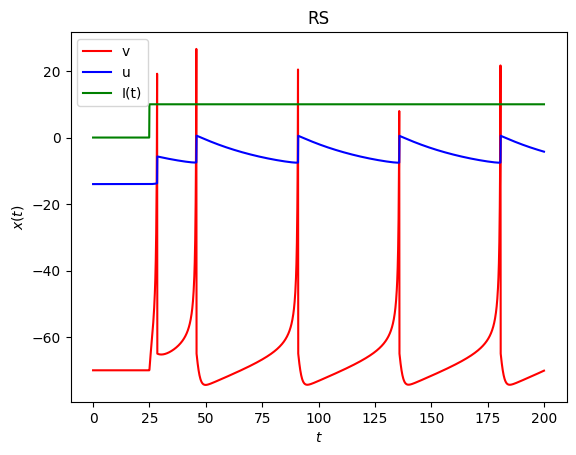

In [43]:
# 2.3)
def I_1(t):
    return 0 if t < 25 else 10
    
def f_i1(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_1(t),
                    b * (c * v - u)
                    ])
    


#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-65,30,8])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('RS')
plt.legend()

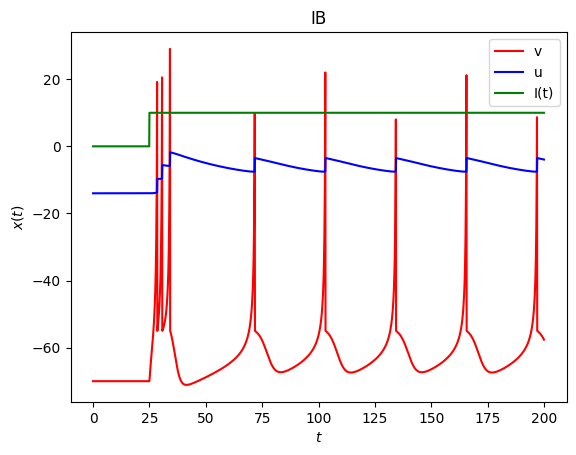

In [45]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-55,30,4])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('IB')
plt.legend()

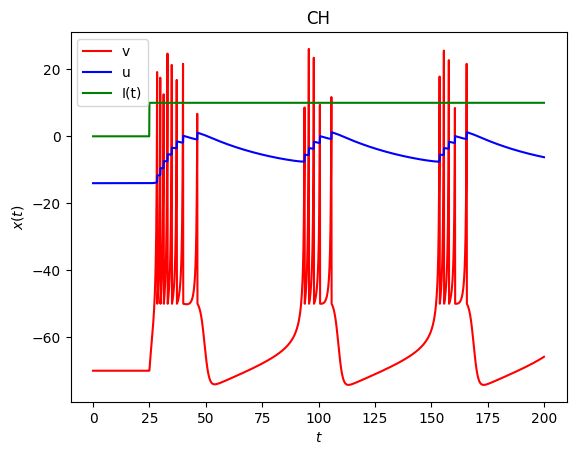

In [46]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-50,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('CH')
plt.legend()

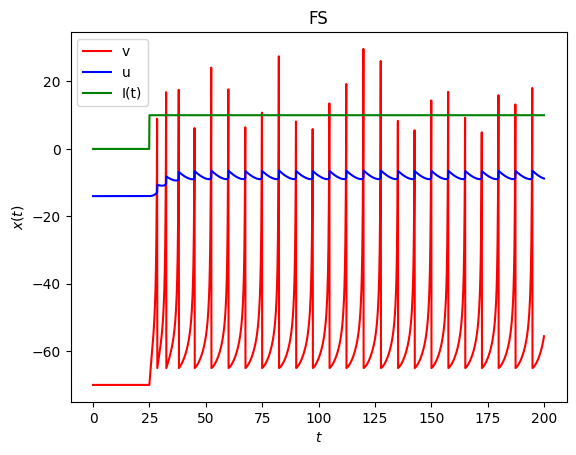

In [47]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.1,0.2,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('FS')
plt.legend()

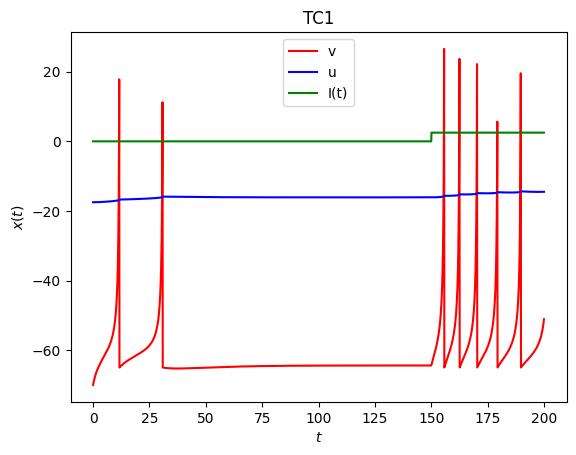

In [59]:
# 2.3)
def I_2(t):
    return 0 if t < 150 else 2.5
    
def f_i2(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_2(t),
                    b * (c * v - u)
                    ])
    

#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.25,-65,30,0.05])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i2,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_2(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('TC1')
plt.legend()

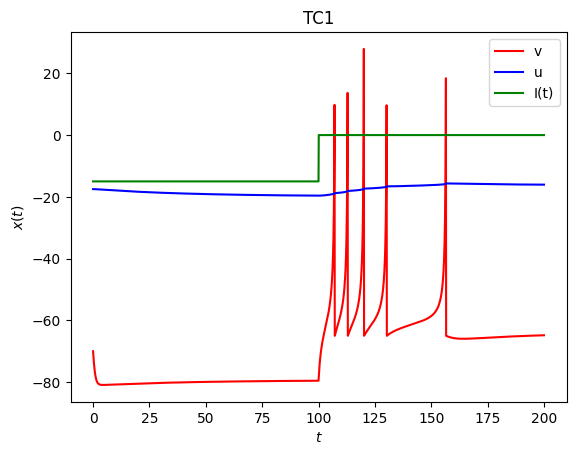

In [60]:
# 2.3)
def I_3(t):
    return -15 if t < 100 else 0
    
def f_i3(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_3(t),
                    b * (c * v - u)
                    ])

#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.25,-65,30,0.05])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i3,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_3(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('TC2')
plt.legend()

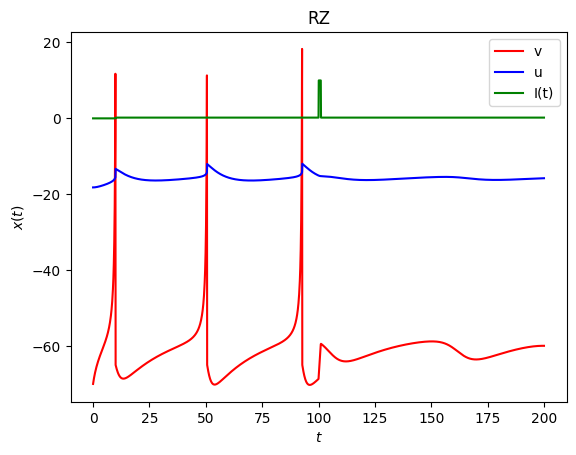

In [74]:
# 2.3)
def I_4(t):
    if t<10:
        return 0
    elif 10<= t <100:
        return 0.2
    elif 100<= t and t<101:
        return 10
    return 0.2
    
def f_i4(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_4(t),
                    b * (c * v - u)
                    ])

#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.1,0.26,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i4,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_4(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('RZ')
plt.legend()

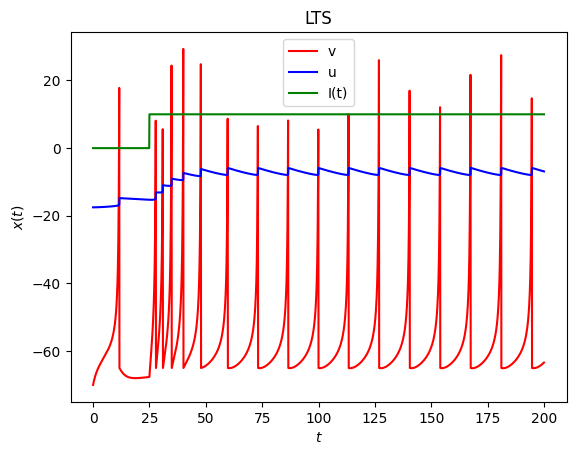

In [78]:
#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.25,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('LTS')
plt.legend()

## **Ejercicio 3)** Red de neuronas de Izhikevich

### El método de Euler-Maruyama

Nos interesa resolver una Ecuación Diferencial Estocástica (SDE) de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (1)$$

donde, para cada $t\in \mathbb{R}$, las variables $X_t,W_t$ son estocásticas con soporte en $\mathbb{R}$, y $f,g \in (\mathbb{R}^2\to \mathbb{R})$ son funciones relativamente arbitrarias.
Como función de $t$, asuminos que $W_t$ describe un proceso de Wiener. Es decir, asumimos que

1. $W_t$ es una variable estocástica normalmente distribuida de valor esperado $\langle W_t \rangle = 0$ y varianza $\langle (W_t-\langle W_t\rangle)^2 \rangle = \langle W_t^2 \rangle = wt$ para algún $w\geq 0$, y

2. las variables estocásticas $W_{t+s}-W_s$ (caminatas futuras) y $W_s$ (caminatas pasadas) son estadísticamente independientes para todo $t\geq 0$ y $s\leq t$.

Nos interesa resolver la Ec. (1) en un intervalo $t\in [0,T]$ para una condición inicial $X_0=x_0$.

El método de Euler-Maruyama provee una aproximación $Y_t \approx X_t$ para $t\in \{0,\tau,2\tau,...,T\}$ donde $\tau=T/N$ para algún $N\gg 1$ fijo, y viene dado por la cadena de Markov

$$Y_{t+\tau} = Y_t + f(Y_t,t)\tau + g(Y_t,t)w\sqrt{\tau}\mathcal{N}\;\;\;\; (2)$$

donde $Y_0=x_0$ y $\mathcal{N}$ es una variable aleatoria normalmente distribuida de valor esperado $0$ y varianza $1$.

#### Caso multidimensional

El caso multidimensional es de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (4)$$

donde $X_t,f(X_t,t) \in \mathbb{R}^d$, $g(X_t,t)\in \mathbb{R}^{d\times m}$ y $W_t\in \mathbb{R}^m$ para $d,m \in \mathbb{N}$.

En componentes

$$dX_{it} = f_i(X_t,t)dt + \sum_{j=1}^m g_{ij}(X_t,t)dW_{jt}\;\;\;\; (5)$$

Luego, la aproximación de Euler Maruyama toma la forma

$$Y_{i,t+\tau} = Y_{it} + f_i(Y_t,t)\tau + \sum_{j=1}^m g_{ij}(Y_t,t)w_j\sqrt{\tau}\mathcal{N}_j\;\;\;\; (6)$$

donde $\mathcal{N}_1,...,\mathcal{N}_m$ son variables aleatorias independientes, normalmente distribuidas, de valor esperado 0 y varianza 1.

### Red neuronal de Izhikevich

El modelo de neurona de Izhikevich es una Ecuación Diferencial Ordinaria (ODE), por lo que no hay estocasticidad.

Para simular una red, Izhikevich propone acoplar un sistema de neuronas con señales de ruido, tornando la ODE en una SDE.
Concretamente, propone acoplar $n_e$ neuronas exitatorias y $n_i$ neuronas inhibitorias mediante una matriz de interacciones $a_{ij}$ con $i,j\in \{1,2,...,n\}$ para $n:=n_e+n_i$ utilizando la ODE

\begin{eqnarray}
\dot{v}_i(t) & = &  g_2v_i^2(t) + g_1v_i(t) + g_0 - u_i(t) + \sum_{j=1}^n a_{ij} \Theta(v_j(t)) \;\;\;\; (7) \\
\dot{u}_i(t) & = &  b_i(c_iv_i(t)-u_i(t))
\end{eqnarray}

donde $I_i(t) = \sum_{j=1}^n a_{ij} \Theta(v_j(t))$ representa el input externo afectando a la neurona $i$.
Considerando valores $r_{ij}$ tomados aleatoria e independientemente de la distribución uniforme en $[0,1]$, se utiliza $a_{ij}=\frac{1}{2}r_{ij}$ para todo $i$ y $j=1,...,n_e$ (i.e. señales provenientes de neuronas exitatorias) y $a_{ij}=-r_{ij}$ para todo $i$ y $j=n_e+1,...,n$ (i.e. señales provenientes de neuronas inhibitorias).
Aquí, la función escalón de Heaviside, la cual satisface $\Theta(x)=1$ si $x>0$ y $\Theta(x)=0$ en caso contrario, es utilizada para normalizar la señal de disparo de las neuronas de entrada.
El disparo de la $i$-ésima neurona se implementa aplicando la condición de reseteo

\begin{eqnarray}
v_i(t) &\leftarrow& v_{i-} \;\;\;\; (8) \\
u_i(t) &\leftarrow& u_i(t) + \Delta u_i \\
\end{eqnarray}

cuando $v_i(t) \geq v_{i+}$.
Los valores de los parámetros para las variables exitatorias son son $b_i=0.02$, $c_i=0.2$, $v_{i-} = -64+15r_i^2$ y $\Delta u_i = 8-6r_i^2$, donde $R_i$ es la realización de una variable aleatoria definida uniformemente en el intervalo $[0,1]$.
Mientras que para las variables inhibitorias son $b_i=0.02+0.08r_i$, $c_i=0.25-0.05r_i$, $v_{i-} = -65$ y $\Delta u_i = 2$.
Esto introduce heterogeneida en el sistema, y la idea es que los límites $r_i=0$ corresponde neuronas que disparan regularmente, mientras que $r_i=1$ a neuronas *parloteantes*.

Luego, Izhikevich incorpora un ruido estocástico $dW_i(t)$ a la señal de entrada $I_i(t)$, de modo que el sistema de ODEs se transforma en un sistema de SDEs en donde las variables $v_i(t)$ y $u_i(t)$ se convierten en variables estocásticas $V_{i}(t)$ y $U_{i}(t)$, respectivamente.
De esta manera, en la aproximación de Euler-Maruyama, la Ec. (7) adopta la forma

\begin{eqnarray}
dV_{it} & = &  \bigg(g_2V_{it}^2 + g_1V_{it} + g_0 - U_{it} + \sum_{j=1}^n a_{ij} \Theta(V_{it})\bigg)dt + dK_{it} \;\;\;\; (9) \\
dU_{it} & = &  b_i(c_iV_{it}-U_{it})dt
\end{eqnarray}

donde $dK_{it}$ representa el ruido estocástico Gaussiano $dW_i(t)$ anteriormente mencionado.
Los valores $dK_{it}$ se obtienen de la distribución Gaussiana de media 0 y desviación estandard igual a $5$ para $i=1,...,n_e$ e igual a $2$ para $i=n_e+1,...,n$.
Obviando el reseteo de la Ec. (8), el sistema de SDEs de la Ec. (9) corresponde al sistema de la Ec. (5) cuando:

1. $X_{it} = V_{it}$,

2. $X_{i+n,t} = U_{it}$,

3. $f_i(X_t,t) = g_2X_{it}^2 + g_1X_{it} + g_0 - X_{i+n,t} + \sum_{j=1}^n a_{ij} \Theta(X_{it})$,

4. $f_{i+n}(X_t,t) = b_i(c_iX_{it}-X_{i+n,t})$,

para todo $i=1,...,n$,

5. y que

    \begin{eqnarray}
    g_{ij}(X_t,t)
    &=&
    \left\{
    \begin{array}{ll}
    5 & i=j\leq n_e, \\
    2 & n_e \leq i=j\leq n, \\
    0 & c.c.
    \end{array}
    \right.
    \end{eqnarray}

    de manera que

    $$
    dK_{it} = \sum_{j=1}^n g_{ij}(X_t,t) dW_{jt}
    $$

    donde $dW_{jt}$ es una variable aleatoria tomada de la distribución Gaussiana de media 0 y varianza 1 para todo tiempo $t$ y neurona $j=1,...,n$.

### Refs.

* https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
* https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

* https://github.com/mattja/sdeint/blob/master/sdeint/integrate.py

* https://diffeq.sciml.ai/stable/tutorials/sde_example/

**1)** Adapte el código en Matlab del paper de Izhikevich a código en Python.

**2)** Acomode el código anterior a la teoría mencionada remplazando la función escalón $\Theta$ de Heavised por la función

$$
z(v)=\frac{87+v}{450}-0.0193
$$

**3)** Reproduzca la figura 3 del paper. Sugerencia, compartimentabilice el código en funciones, identificando las distintas componentes mencionadas en la teoría.

In [5]:
# 3.1)